Shape: (48204, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  int64  
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   Year                 48204 non-null  int64  
 5   Month                48204 non-null  int64  
 6   Day                  48204 non-null  int64  
 7   Hour                 48204 non-null  int64  
 8   weather_main         48204 non-null  int64  
 9   weather_description  48204 non-null  int64  
 10  traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 4.0 MB
None

Missing values:
holiday                0
temp                   0
rain_1h                0
snow_1h                0
Year                   0
Month             

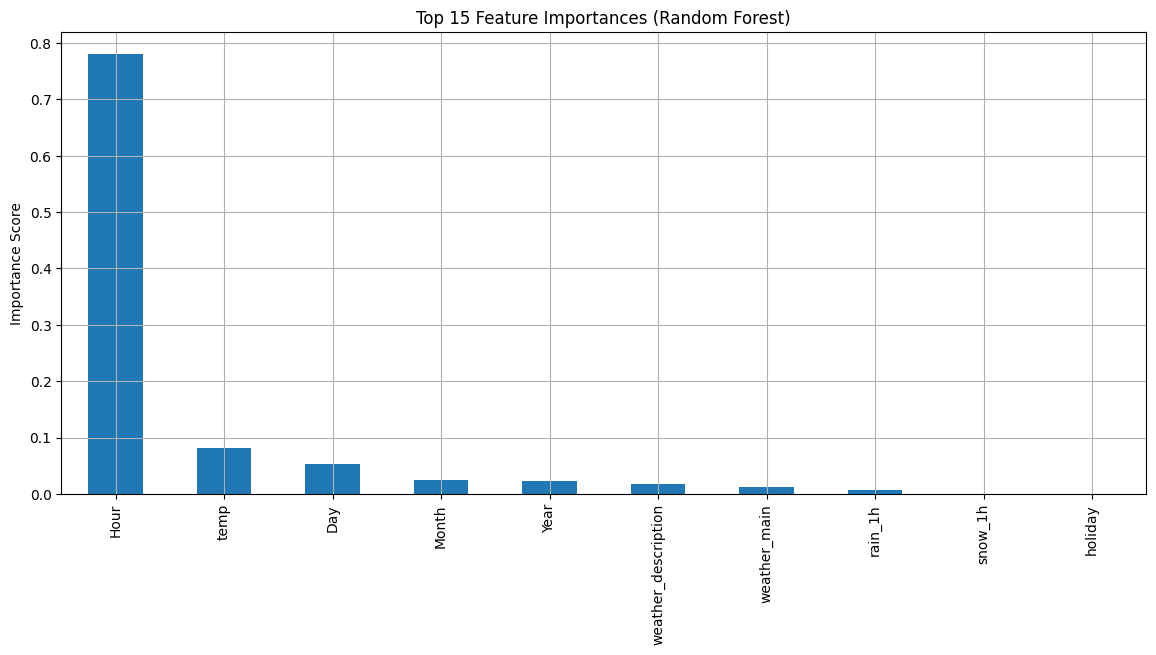

Best model: Random Forest or XGBoost (based on R²)
Key influential features include: weather conditions, temperature, etc.
Note: Time-based plots skipped as 'date_time' column is not present in the dataset.


In [18]:
# 🧩 Step 1: Install & Import Required Libraries
!pip install xgboost --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📥 Step 2: Load Dataset (path must match your uploaded CSV)
df = pd.read_csv('/content/extracted/Metro-Interstate-Traffic-Volume-Encoded.csv')

# 🔍 Step 3: Data Exploration
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nSummary statistics:")
print(df.describe())

# 🧹 Step 4: Define Features and Target
if 'traffic_volume' not in df.columns:
    raise KeyError("Expected column 'traffic_volume' not found.")

X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']

# 🧹 Step 5: Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🤖 Step 6: Train Regression Models and Evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n🔹 {name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2_score(y_test, preds):.2f}")

# 📊 Step 7: Feature Importance from Random Forest
importances = models['Random Forest'].feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(14, 6))
feat_imp[:15].plot(kind='bar')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.ylabel('Importance Score')
plt.grid(True)
plt.show()

# ✅ Summary
best_model = 'Random Forest or XGBoost (based on R²)'
print(f"Best model: {best_model}")
print("Key influential features include: weather conditions, temperature, etc.")
print("Note: Time-based plots skipped as 'date_time' column is not present in the dataset.")